### Least Squares Method

![](http://bigsec.net/b52/scipydoc/_images/math/8da054a2d9fb73326f9fc0a3141cea13d49db11f.png.pagespeed.ce.jjnL4jkq6Z.png)

Assume we have a group of data x[i] and y[i], and we know their relationship y=f(x). Based on these information we need to know the parameters in f(x). For example, if f is a linear function f(x)=kx+b, then we need to know coefficients k and b. If we represent these coefficients with p, then we need to find a group of p values (p = [k,b]) so that S(p) reaches the minimum. 

In [10]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [3]:
def func(x,p):
    """
    Expected Data
    """
    A, k, theta = p
    return A*np.sin(2*np.pi*k*x+theta)

In [4]:
def residuals(p,y,x):
    """
    Experiment data x, y
    Coefficient p
    """
    return y-func(x,p)

In [6]:
x = np.linspace(0,-2*np.pi,100)
A,k,theta = 10,0.34,np.pi/6       # Expected data coefficient
y0 = func(x,[A,k,theta])          # Expected data
y1 = y0+2*np.random.randn(len(x)) # Experimental data with noise

p0 = [7,0.2,0]   # First guess of coefficient

In [7]:
plsq = leastsq(residuals,p0,args=(y1,x))

print("Actual coefficients: ",[A,k,theta])
print("Computed coefficients: ",plsq[0])

Actual coefficients:  [10, 0.34, 0.5235987755982988]
Computed coefficients:  [10.13674345  0.34289407  0.66045929]


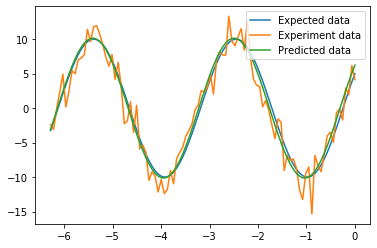

In [14]:
plt.plot(x,y0,label="Expected data")
plt.plot(x,y1,label="Experiment data")
plt.plot(x,func(x,plsq[0]),label="Predicted data")
plt.legend()
pl.show()

### Function minimum

The optimize library provides several algorithm to compute function minimum value: fmin, fmin_powell, fmin_cg, fmin_bfgs. 

For a system h, if the input is x, then the output can be represented by the convolution of x and h: y = x * h. Now if we know x and y, how do we compute the system transfer function h? Or if we know y and h, how do we know the input x? Such computation is called *Transposed convolution*. Yet in real application, measuring the system output always have errors. 

In [15]:
import scipy.optimize as opt

In [16]:
def test_fmin_convolve(fminfunc,x,h,y,yn,x0):
    """
    x*h=y, * means convolution
    yn is y with noise
    x0 is the initial value used to solve for x
    """
    def convolve_func(h):
        """
        compute the power of yn-x*h
        use fmin() to compute and make the power at the minimum
        """
        return np.sum((yn-np.convolve(x,h))**2)
    # use x0 as the initial value in fmin function
    h0 = fminfunc(convolve_func,x0)
    
    print(fminfunc.__name__)
    print("---------------")
    # relative error between x*h0 and y
    print("error of y: ", np.sum((np.convolve(x,h0)-y)**2)/np.sum(y**2))
    # relative error between h0 and h
    print("error of h: ", np.sum((h0-h)**2)/np.sum(h**2))
    print()

In [17]:
def test_n(m, n, nscale):
    """
    generate random array x, h, y, yn, x0, and use different fmin() to solve for b
    m is the length of x, n is the length of h, nscale is noise scale
    """
    x = np.random.rand(m)
    h = np.random.rand(n)
    y = np.convolve(x,h)
    yn = y+np.random.rand(len(y))*nscale
    x0 = np.random.rand(n)
    
    test_fmin_convolve(opt.fmin,x,h,y,yn,x0)
    test_fmin_convolve(opt.fmin_powell,x,h,y,yn,x0)
    test_fmin_convolve(opt.fmin_cg,x,h,y,yn,x0)
    test_fmin_convolve(opt.fmin_bfgs,x,h,y,yn,x0)

In [18]:
if __name__ == "__main__":
    test_n(200,20,0.1)

fmin
---------------
error of y:  0.0003305621115086869
error of h:  0.013539566294187878

Optimization terminated successfully.
         Current function value: 0.196954
         Iterations: 38
         Function evaluations: 7070
fmin_powell
---------------
error of y:  0.00011943185131530105
error of h:  0.0003528847467505001

Optimization terminated successfully.
         Current function value: 0.196641
         Iterations: 13
         Function evaluations: 638
         Gradient evaluations: 29
fmin_cg
---------------
error of y:  0.0001198129186260241
error of h:  0.00033980841294617024

Optimization terminated successfully.
         Current function value: 0.196641
         Iterations: 31
         Function evaluations: 990
         Gradient evaluations: 45
fmin_bfgs
---------------
error of y:  0.00011981291872522334
error of h:  0.000339807967941651

